<a href="https://colab.research.google.com/github/nhamhung/Coder-School-Machine-Learning/blob/master/Team_WorldCup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#importing libraries
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
import io
import base64
from matplotlib import rc,animation
from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
import os


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
winners = pd.read_csv('/content/drive/My Drive/FTMLE - Philippines/Week 3/assignments/datasets/06-world-cup/winners.csv')
players = pd.read_csv('/content/drive/My Drive/FTMLE - Philippines/Week 3/assignments/datasets/06-world-cup/players.csv')
matches = pd.read_csv('/content/drive/My Drive/FTMLE - Philippines/Week 3/assignments/datasets/06-world-cup/matches.csv')

# Numberical data
For numberical data: How is the data distributed? How are they correlated? Provide summary statistics of these data (Review the slides Descriptive Statistics on Monday)? Identify outliers, check if they are errors or simply abnormalities in the data. ?

# Stat
 - What time most likely to score
 - Which team win the most Penalty
 - When Yellow and Red card are drawn on
 - Which team win most final, most matches
 - Which team score most goals
 - Which team have highest avg score per match
 - Ratio win of Home team vs away team
 - Where Referee come from
 - Who is the best goal scorer
 - Attendant of stadium
 - Number of goal in match
 - Top semi_final vs penalty
 - Goal Distribution by year


# Process and clean matches with 4 new columns:
- `Match Result`
- `Winner`
- `Loser`
- `Total Goals`

In [0]:
def match_result(home, away):
  if home > away:
    return "Home Win"
  elif home < away:
    return "Away Win"
  else:
    return "Draw"

def winner(a, home, away):
  if home > away:
    return a["Home Team Name"]
  elif home < away:
    return a["Away Team Name"]
  else:
    return "Draw"

def loser(a, home, away):
  if home < away:
    return a["Home Team Name"]
  elif home > away:
    return a["Away Team Name"]
  else:
    return "Draw"

# Remove duplicate rows with same MatchID column
matches = matches.drop_duplicates(subset="MatchID", keep="first")

# Remove rows where Year is null
matches = matches[matches["Year"].notnull()]

# Convert data to type `int`
matches["Home Team Goals"] = matches["Home Team Goals"].astype("int")
matches["Away Team Goals"] = matches["Away Team Goals"].astype("int")
matches["Half-time Home Goals"] = matches["Half-time Home Goals"].astype("int")
matches["Half-time Away Goals"] = matches["Half-time Away Goals"].astype("int")

# Create 4 new columns
matches["Match Result"] = matches.apply(lambda matches: match_result(matches["Home Team Goals"], matches["Away Team Goals"]), axis=1)
matches["Winner"] = matches.apply(lambda matches: winner(matches, matches["Home Team Goals"], matches["Away Team Goals"]), axis=1)
matches["Loser"] = matches.apply(lambda matches:loser(matches, matches["Home Team Goals"], matches["Away Team Goals"]), axis=1)
matches["Total Goals"] = matches["Home Team Goals"] + matches["Away Team Goals"]

# Further cleaning
matches.drop_duplicates(subset="MatchID", keep="first")
matches["Year"] = matches["Year"].astype(int)
matches["Attendance"] = matches["Attendance"].fillna("0")
matches["Attendance"] = matches["Attendance"].astype(int)

# Clean team names
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">United Arab Emirates',"United Arab Emirates")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("C�te d'Ivoire","Côte d’Ivoire")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Republic of Ireland',"Republic of Ireland")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Serbia and Montenegro',"Serbia and Montenegro")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("Soviet Union","Russia")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("Germany FR","Germany")

matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">United Arab Emirates',"United Arab Emirates")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("C�te d'Ivoire","Côte d’Ivoire")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Republic of Ireland',"Republic of Ireland")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Serbia and Montenegro',"Serbia and Montenegro")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("Germany FR","Germany")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("Soviet Union","Russia")

# Analyse Generic Statistics:
- Total attendance by year
- All goals scored by year
- Number of qualified teams per year
- Number of matches played per year
- Matches with highest attendance

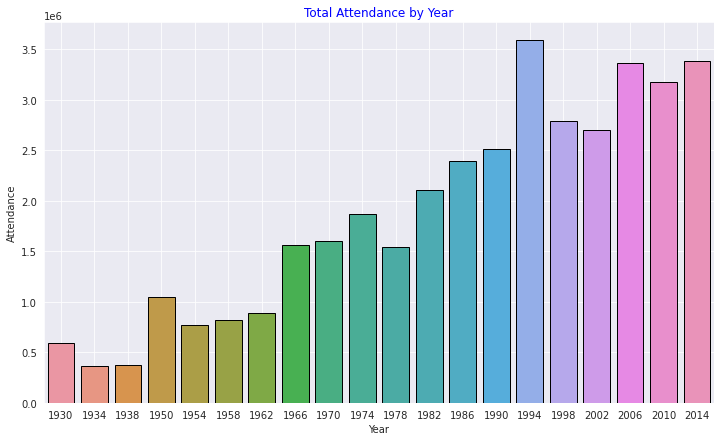

In [0]:
# Total attendance by year
sns.set_style("darkgrid")

total_attendance = matches.groupby("Year")["Attendance"].sum().reset_index()
total_attendance["Year"] = total_attendance["Year"].astype(int)

plt.figure(figsize=(12, 7))
sns.barplot(total_attendance["Year"], total_attendance["Attendance"], linewidth=1, edgecolor="k")

plt.grid(True)
plt.title("Total Attendance by Year", color='blue')
plt.show()

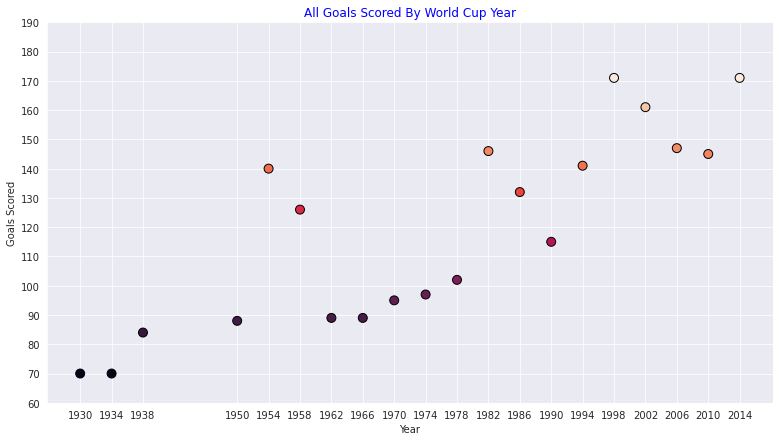

In [0]:
# Total number of goals scored per year
goals_year = winners[['Year', 'GoalsScored']]
plt.figure(figsize=(13, 7))
ax = plt.scatter("Year", "GoalsScored", data=goals_year, c=goals_year["GoalsScored"], s=80, edgecolor="k",)

plt.xticks(goals_year['Year'].unique())
plt.yticks(np.arange(60, 200, 10))
plt.grid(True)
plt.title("All Goals Scored By World Cup Year", color="b")
plt.xlabel("Year")
plt.ylabel("Goals Scored")
plt.show()

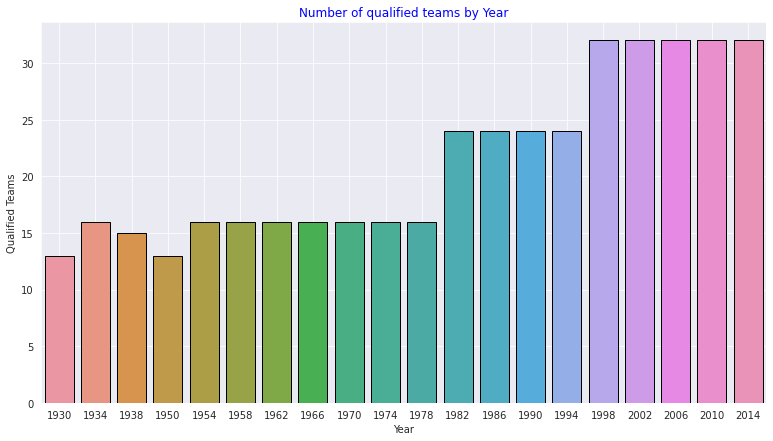

In [0]:
# Number of qualified teams by year

winners['Year_str'] = winners['Year'].astype('str')
plt.figure(figsize=(13, 7))
sns.barplot("Year_str", "QualifiedTeams", data=winners, edgecolor="k")
plt.grid(True)
plt.title("Number of qualified teams by Year", color="b")
plt.xlabel("Year")
plt.ylabel("Qualified Teams")
plt.show()

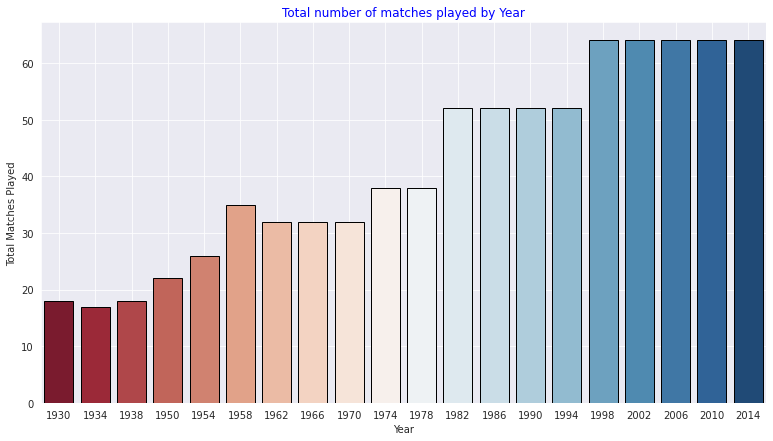

In [0]:
# Total number of matches played per year
plt.figure(figsize=(13, 7))
sns.barplot("Year_str", "MatchesPlayed", data=winners, palette="RdBu", edgecolor="k")
plt.grid(True)
plt.title("Total number of matches played by Year", color="b")
plt.xlabel("Year")
plt.ylabel("Total Matches Played")
plt.show()

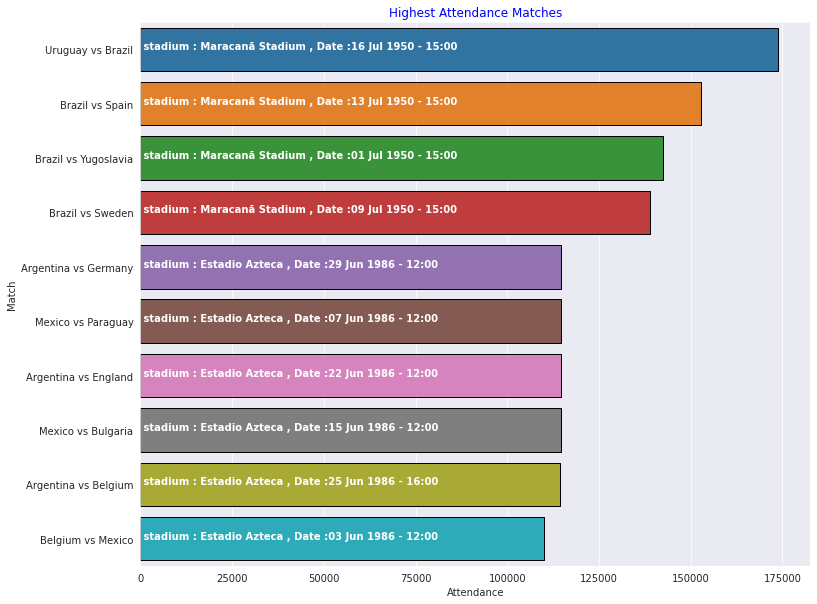

In [0]:
# Matches with the highest attendance
attendance_matches = matches[["Year", "Datetime", "Stadium", "City", "Home Team Name", "Home Team Goals", "Away Team Goals", "Away Team Name", "Attendance", "MatchID"]]
top_10 = attendance_matches.sort_values("Attendance", ascending=False)[:10]

top_10["Stadium"] = top_10["Stadium"].replace("Maracan� - Est�dio Jornalista M�rio Filho", "Maracanã Stadium")
top_10["Match"] = top_10["Home Team Name"] + " vs " + top_10["Away Team Name"]

plt.figure(figsize=(12, 10))
plt.grid(True)
plt.title("Highest Attendance Matches", color="b")
ax = sns.barplot("Attendance", "Match", data=top_10, edgecolor="k")
for index,content in enumerate(" stadium : " + top_10["Stadium"] +" , Date :" + top_10["Datetime"]):
  ax.text(0.5, index, content, color="w", weight="bold")
plt.show()

# More specific statistics:

- Match information:
  - Goal distribution in each World Cup
  - At what time does a team most likely score?
  - When do Yellow and Red cards tend to be drawn?
  - Where do the referees come from?

- Team:
  - Which team wins the most championship?
  - Which team plays the most number of matches?
  - Which team scores the most number of goals overall?
  - Ratio win of home team against away team
  - Which team has the highest average score per match?
  - Is there a correlation between winning many penalty shootouts and getting into top 4?
  - Who is the best goal scorer of all time?


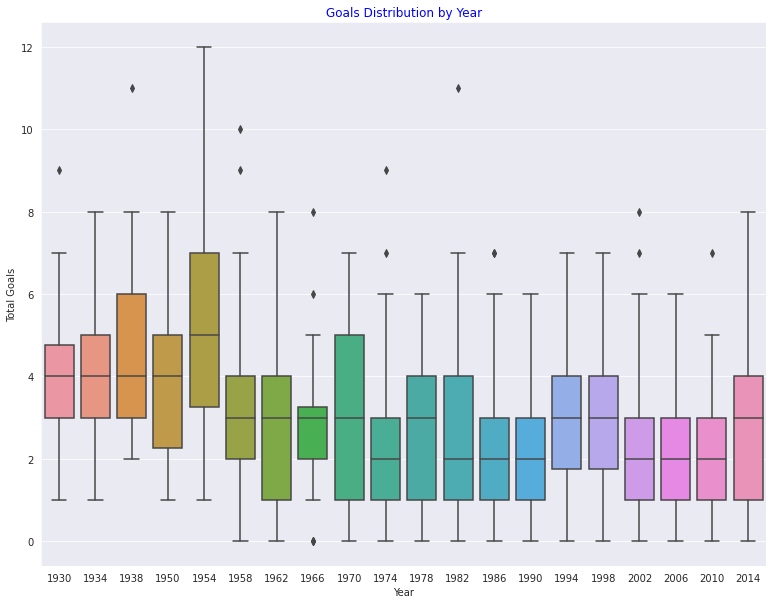

In [0]:
# Goal distribution by year

plt.figure(figsize=(13, 10))
ax = sns.boxplot("Year", "Total Goals", data=matches)
plt.title("Goals Distribution by Year", color="b")
plt.show()

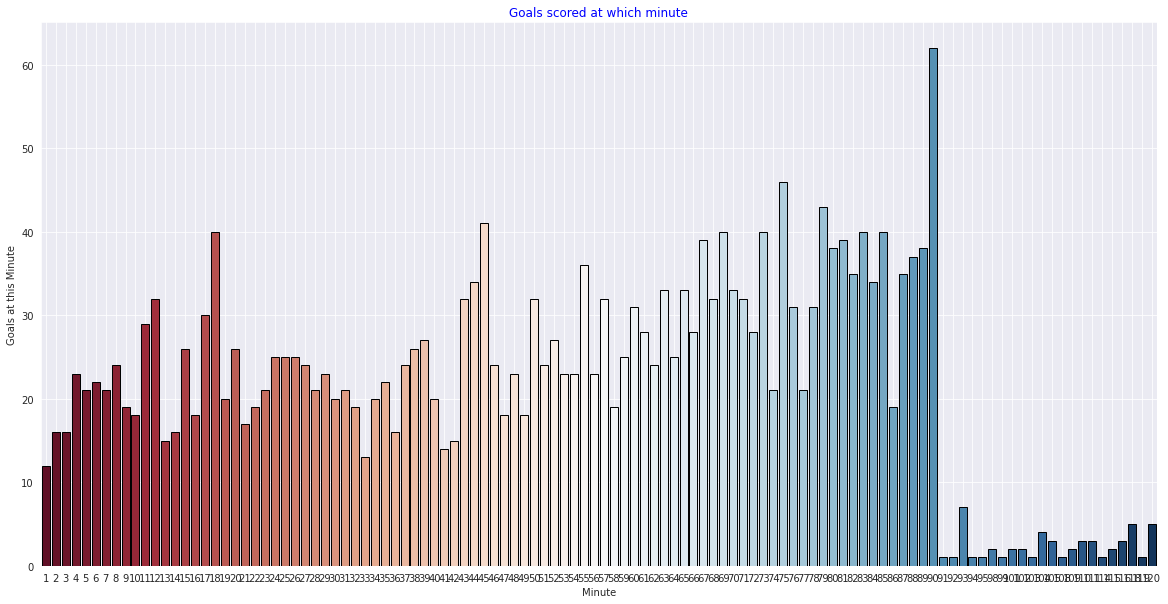

In [0]:
# At what time would it be most likely for a team to score?
import pandas as pd

events = players[players["Event"].notnull()]
events = events[["Team Initials", "Player Name", "Position", "Event"]]

def extract_minute(event):
  event_lis = [x for x in event.split(" ")]
  minutes = []
  for x in event_lis:
    digits = [i for i in x if i.isdigit()]
    minutes.append("".join(digits))
  return minutes

def is_goal(event):
  if event[0] == "G" or event[0:2] == "OG" or event[0] == "P":
    return "Goal"
  else:
    return "Not Goal"

def insert_minutes(lis, minutes):
  if len(lis) > 1:
    for x in lis:
      minutes.append(x)
  else:
    minutes.append(lis[0])

events["Score"] = events.apply(lambda x:is_goal(x["Event"]), axis=1)
events["Minutes"] = events.apply(lambda x:extract_minute(x["Event"]), axis=1)
events = events[events["Score"] == "Goal"]
events = events[["Minutes"]]

minutes = []
events.apply(lambda event:insert_minutes(event["Minutes"], minutes), axis=1)

minutes = pd.DataFrame(minutes, columns=["Minutes"])
minutes["Minutes"] = minutes["Minutes"].astype(int)
minutes = minutes["Minutes"].value_counts().reset_index()
minutes.columns = ["Minutes", "Count"]
minutes = minutes.sort_values("Minutes", ascending=True)

plt.figure(figsize=(20,10))
sns.barplot("Minutes", "Count", data=minutes, palette="RdBu", edgecolor="k")
plt.grid(True)
plt.title("Goals scored at which minute", c="b")
plt.xlabel("Minute")
plt.ylabel("Goals at this Minute")
plt.show()

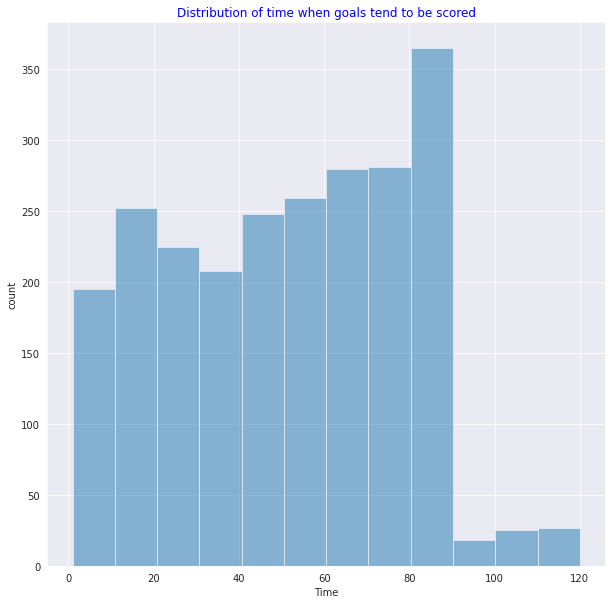

In [0]:
import re
# Extract a list of time goal was scored included Owngoal(OG), Penalty (P)
list_goal_time = []
for i in players['Event']:
    list_goal_time.extend(re.findall(r'G(\d{1,3})', str(i)))
    list_goal_time.extend(re.findall(r'OG(\d{1,3})', str(i)))
    list_goal_time.extend(re.findall(r'P(\d{1,3})', str(i)))

list_goal_time
goal_time = [int(i) for i in list_goal_time]
goal_time.sort()

# goal_time
# Plot on histogram, using 

# plt.xlim([min(goal_time), max(goal_time)])

plt.figure(figsize=(10, 10))
plt.hist(goal_time,bins= 12, alpha=0.5)
plt.title('Distribution of time when goals tend to be scored', color="b")
plt.xlabel('Time')
plt.ylabel('count')

plt.show()

In [0]:
# Extract a list of time goal was scored included Owngoal(OG), Penalty (P)
list_yellow_time = []
list_red_time = []
for i in players['Event']:
    list_yellow_time.extend(re.findall(r'Y(\d{1,3})', str(i)))
    list_red_time.extend(re.findall(r'R(\d{1,3})', str(i)))
    

yellow_time = [int(i) for i in list_yellow_time]
red_time = [int(i) for i in list_red_time]

bins = np.arange(0, 120, 120) # fixed bin size

# plt.xlim([min(goal_time), max(goal_time)])
plt.figure(figsize=(10, 10))
plt.hist(yellow_time,bins= 8, alpha=0.5)
plt.title('Distribution of the time when yellow cards tend to be drawn', color='b')
plt.xlabel('Time')
plt.ylabel('Count')

plt.show()

NameError: ignored

In [0]:
plt.figure(figsize=(10, 10))
plt.hist(red_time,bins= 8, alpha=0.5)
plt.title('Distribution of time when redcard was drawn', color="b")
plt.xlabel('Time')
plt.ylabel('Count')

plt.show()

NameError: ignored

<Figure size 720x720 with 0 Axes>

In [0]:
# Where referee comes from
matches['ref_nation'] = matches['Referee'].apply(lambda x: re.findall(r'\((\w{3})\)', x)[0])
referee = matches.groupby(['ref_nation'])['Referee'].count().reset_index().sort_values('Referee',ascending = False)
referee = referee.reset_index().drop(columns = 'index')
referee.rename(columns = {'Referee':'Count'}, inplace=True)

fig, ax = plt.subplots(figsize=(10,10))
ax.bar(referee['ref_nation'][:20], referee['Count'][:20])
ax.set(title='Top countries ', 
       xlabel='Country',
       ylabel='Number of referee')
       
plt.show()

In [0]:
 # Best Goal Scorer:
def goal_score(x):   
  num_goal = len(re.findall(r'G(\d{1,3})', str(x))) + len(re.findall(r'P(\d{1,3})', str(x)))
  return num_goal

players['num_goal'] = players['Event'].apply(goal_score)
best_score = players.groupby(['Player Name', 'Team Initials']).sum()['num_goal'].sort_values(ascending=True)
best_score = best_score.to_frame().rename(columns = {'num_goal':'Goals'})
best_score = best_score[best_score['Goals'] > 0]
best_score = best_score.reset_index()
best_score = best_score[-20:]

fig, ax = plt.subplots(figsize=(10,10))
ax.barh(best_score['Player Name'], best_score['Goals'])
ax.set(title='Top 20 Scorer ', 
       xlabel='Number of goals',
       ylabel='Player',
       xlim=[0, 20])

ax.axvline(best_score['Goals'].mean(), color = 'r', linestyle = '--')

ax.text(17, 19, 'Best scorer of all time')

plt.show()

In [0]:
# Audience attendance

audi = matches.groupby('Year')['Attendance'].sum().reset_index().astype('int64')
num_team = winners[['Year','QualifiedTeams']]
team_audi = pd.merge(left=audi, right=num_team, on='Year', how='left')
team_audi.head()

year = team_audi['Year']
att = team_audi['Attendance']
team = team_audi['QualifiedTeams']
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20, 10))


plt.subplot(1, 2, 1)
plt.xlabel('Year')
plt.ylabel('Attendants')
plt.title('Number of attendant over year')
plt.plot(year,att)



plt.subplot(1, 2, 2)
plt.xlabel('Year')
plt.ylabel('Qualified team')
plt.title('Number of qualified team over year')
plt.plot(year, team)

plt.show()

In [0]:
# Which team has the most final wins

winners["Winner"] = winners["Winner"].replace("Germany FR", "Germany")
winners["Runners-Up"] = winners["Runners-Up"].replace("Germany FR", "Germany")

w1 = winners.groupby("Winner")["Year_str"].apply(" , ".join).reset_index()
w2 = winners.groupby("Winner")["Year"].count().reset_index()
w12 = w1.merge(w2, left_on="Winner", right_on="Winner", how="left")
w12 = w12.sort_values("Year", ascending=False)

plt.figure(figsize=(10, 8))
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
ax = sns.barplot("Year", "Winner", data=w12, edgecolor="k", palette=flatui)
plt.title("Teams with the most WC final wins", c="b")
plt.xlabel("Wins")
plt.ylabel("Champions")

for i, j in enumerate("Years: " + w12["Year_str"]):
  ax.text(.1, i, j, c="w", weight="bold")

plt.show()

In [0]:
# Which team has the most world cup matches

home_team = matches["Home Team Name"].value_counts().reset_index()
home_team.columns = ["Team", "Matches"]
away_team = matches["Away Team Name"].value_counts().reset_index()
away_team.columns = ["Team", "Matches"]

merge_team = pd.concat([home_team, away_team], axis = 0)
merge_team = merge_team.groupby("Team")["Matches"].sum().reset_index()
merge_team = merge_team.sort_values(by="Matches", ascending=False)
merge_team

plt.figure(figsize=(10, 13))
ax = sns.barplot("Matches", "Team", data=merge_team[:25], palette="husl", edgecolor="k")
plt.grid(True)
plt.title("Teams with most WC matches", c="b")

for i, j in enumerate("Number of matches: " + merge_team["Matches"][:25].astype(str)):
  ax.text(.5, i, j, color="w", weight="bold")
plt.show()

In [0]:
# Ratio of Home Win vs Away Win

plt.figure(figsize=(10, 10))
total = len(matches)
ax = sns.countplot(y = "Match Result", data=matches)
plt.title("Match Result Distribution")

for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_width() / total)
  x = p.get_x() + p.get_width() + 0.02
  y = p.get_y() + p.get_height()/2
  ax.annotate(percentage, (x, y))
plt.grid(True)
plt.show()
# matches

In [0]:
# Teams with the highest WC goals
home_team_goals = matches.groupby("Home Team Name")["Home Team Goals"].sum().reset_index()
home_team_goals.columns = ["Team", "Goals"]

away_team_goals = matches.groupby("Away Team Name")["Away Team Goals"].sum().reset_index()
away_team_goals.columns = ["Team", "Goals"]


team_goals = pd.concat([home_team_goals, away_team_goals], axis = 0)
team_goals = team_goals.groupby("Team")["Goals"].sum().reset_index().sort_values(by="Goals", ascending=False)
team_goals["Goals"] = team_goals["Goals"].astype("int")

plt.figure(figsize=(13,13))
ax = sns.barplot("Goals", "Team", data=team_goals[:25], palette="Paired", edgecolor="k")
plt.title("Teams With The Most Number Of World Cup Goals", color="b")
plt.grid(True)

for i, j in enumerate("Goals: " + team_goals["Goals"][:25].astype(str)):
  ax.text(.9, i, j, color="black")
plt.plot()

In [0]:
# Number of times each team wins their penalty shoot-out
import re

def winner(x):
  lis = re.findall(r'\d{1,2}', str(x))
  if len(lis) > 1:
    if lis[0] > lis[1]:
      return "0"
    else:
      return "1"

special_matches = matches[matches["Win conditions"] != " "]
penalties = special_matches[special_matches["Win conditions"].str.contains("penalties")]
penalties["Penalty Winner"] = penalties["Win conditions"].apply(winner)
penalties["Penalty Winner"] = penalties.apply(lambda x: x["Home Team Name"] if x["Penalty Winner"]=="0" else x["Away Team Name"], axis = 1)

plt.figure(figsize=(13, 13))
total = len(penalties)
plt.title("Penalty wins per team", color="b")
ax = sns.countplot(y = "Penalty Winner", data=penalties, edgecolor="k")
ax.set_xlabel("Penalty Wins")
plt.show()

In [0]:
# A function to allow user to extract information regarding past encounters of any two teams
def team_history(team1, team2):
  lis = [team1, team2]

  a = matches[matches["Home Team Name"].isin(lis)]
  a = a[a["Away Team Name"].isin(lis)]

  print("Total Matches        : ", a.shape[0])
  print("Match Years          : ", a["Year"].unique().tolist())
  print("Stadiums Played      : ", a["Stadium"].unique().tolist())
  print("Match Cities         : ", a["City"].unique().tolist())
  print ("Average goals per match : ", np.around(a["Total Goals"].mean(), 2))
  print("-----")
  print("WINS :") 
  print("-----") 
  print(a["Winner"].value_counts().to_string(header = False))

In [0]:
team_history("Brazil", "Germany")

In [0]:
team_history("France", "Portugal")